> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: The Movie Database TMDb

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
- we will use data analysis such as wrangling and cleaning and visualization data to answer some question like.. - Which genres are most popular from year to year? What kinds of properties are associated with movies that have high revenues? 
- Characteristics of shared low-income films..?
- Voting rate for films with highest and lower years ?
- The correlation of voting for the films with the lowest earnings
- The hieghest and lower revenue with name of movie
- and some analysis
- This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.



In [2]:
# load some libraries to data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#load library to more visualization
import seaborn as sns
# it make background of our visualization more confortable
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
#load data set and show some rows
data = pd.read_csv('C:/Users/M/Desktop/project/tmdb-movies.csv')
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Data Assessing

In [4]:
# to show some statistics information
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


* the max revenue is 2.781506e+09 
* the oldest films were in 1960 and the new is 2015


In [5]:
# to show numbers of rows and columns
data.shape

(10866, 21)

In [6]:
# to show some information to our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

* it seems some missing values there



### Data Cleaning 

In [7]:
# there is some coulomns we do not need it so we drop it
data.drop(['id' , 'imdb_id' , 'cast' , 'homepage' , 'keywords' , 'director' , 'tagline' , 'overview' , 'production_companies'] , axis = 1 , inplace = True)

In [8]:
# to check out data aftet deleting columns
data.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
# to show rows with duplicated values
sum(data.duplicated())

1

* There is one row with duplicated

In [10]:
# to remove duplicated values
data.drop_duplicates(inplace = True)

In [11]:
# check data after removing duplicated
sum(data.duplicated())

0

In [12]:
# to chek numbers of null values
data.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

* There is some missing values but we can drop it because it can not affect in dataset

In [13]:
# to drop some missing value
data.dropna(inplace = True)

In [14]:
# to chek numbers of null values
data.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

* Now we did not have any missing values

### now we converting zeros value to mean of it's column

In [15]:
#how to convert zeros to NaN value
data['revenue'].replace([0], np.NaN, inplace= True)

In [16]:
# use mean instead of NaN
mean = data['revenue'].mean()
data['revenue'].fillna(mean , inplace= True)

In [17]:
#how to convert zeros to NaN value
data['budget'].replace([0], np.NaN, inplace= True)

In [18]:
# use mean instead of NaN
mean = data['budget'].mean()
data['budget'].fillna(mean , inplace= True)

In [19]:
#how to convert zeros to NaN value
data['budget_adj'].replace([0], np.NaN, inplace= True)

In [20]:
# use mean instead of NaN
mean = data['budget_adj'].mean()
data['budget_adj'].fillna(mean , inplace= True)

In [21]:
#how to convert zeros to NaN value
data['revenue_adj'].replace([0], np.NaN, inplace= True)

In [22]:
# use mean instead of NaN
mean = data['revenue_adj'].mean()
data['revenue_adj'].fillna(mean , inplace= True)

In [23]:
# check our dataset have no zero
data.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,0.647461,3.074552e+07,8.923886e+07,102.138443,217.823649,5.974064,2001.314794,3.689620e+07,1.151009e+08
std,1.001032,2.685958e+07,1.083868e+08,31.294612,576.180993,0.934257,12.813617,2.896940e+07,1.329795e+08
min,0.000065,1.000000e+00,2.000000e+00,0.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.208210,1.900000e+07,4.091286e+07,90.000000,17.000000,5.400000,1995.000000,2.445229e+07,5.840647e+07
50%,0.384532,3.074552e+07,8.923886e+07,99.000000,38.000000,6.000000,2006.000000,3.689620e+07,1.151009e+08
75%,0.715393,3.074552e+07,8.923886e+07,111.000000,146.000000,6.600000,2011.000000,3.689620e+07,1.151009e+08
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [24]:
#split genres column
data['genres'].str.split('|', n= 1, expand= True)

,0,1
0,Action,Adventure|Science Fiction|Thriller
1,Action,Adventure|Science Fiction|Thriller
2,Adventure,Science Fiction|Thriller
3,Action,Adventure|Science Fiction|Fantasy
4,Action,Crime|Thriller
...,...,...
10861,Documentary,None
10862,Action,Adventure|Drama
10863,Mystery,Comedy
10864,Action,Comedy


In [25]:
# here we named split column
data.rename(columns= {0: 'new_genres' , 1: 'not_need'}, inplace= True)

In [26]:
#adding this columns to the our dataset by its features
data[['new_genres' , 'not_need']]= data.genres.str.split('|',n= 1, expand= True)

In [27]:
#check new dataset after adding
data.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,new_genres,not_need
0,32.985763,150000000.0,1.513529e+09,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure|Science Fiction|Thriller
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure|Science Fiction|Thriller
2,13.112507,110000000.0,2.952382e+08,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction|Thriller
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure|Science Fiction|Fantasy
4,9.335014,190000000.0,1.506249e+09,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime|Thriller


In [28]:
#drop genres and not columns
data.drop(['genres', 'not_need'], axis= 1, inplace= True)

In [29]:
#change new_genres column to genres
data.rename(columns={'new_genres' : 'genres'}, inplace= True)

In [30]:
#check the dataset
data.head()

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,32.985763,150000000.0,1.513529e+09,Jurassic World,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
2,13.112507,110000000.0,2.952382e+08,Insurgent,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action
4,9.335014,190000000.0,1.506249e+09,Furious 7,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Action


## Exploratory Data Analysis


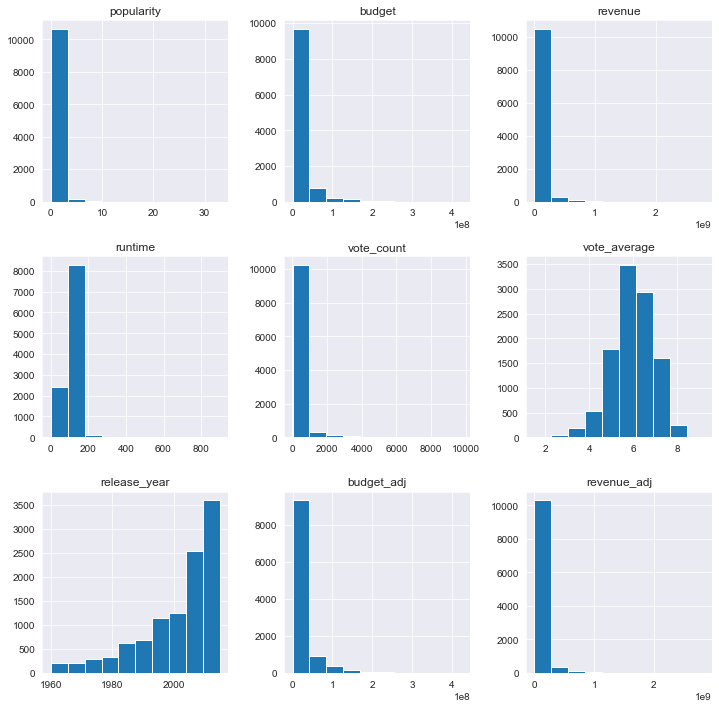

In [31]:
# drow histogram to our columns in dataset 
data.hist(figsize = (12,12));

* producer hieghest increase from maybe (2010 to 2015)
* and with more years with more prodiced movies and here we can say more years its affected on increase movies
* The most average votes are ranged from almost 5.3 to 6.1
* most Runtime of movies are maybe from 160 to 190 minutes and least of movies is more than 210 minutes
* most of histogram not showing the excactly values bacaues there is some zeros value in for example(Runtime .. Revenue ..Revenue_adj .. )

## hieghest and lower revenue with name movie

In [32]:
# showing the max revenue
data['revenue'].max()

2781505847.0

In [33]:
# showing the min revenue
data[data['revenue'] != 0].min()

popularity         6.5e-05
budget                   1
revenue                  2
original_title    $5 a Day
runtime                  0
release_date        1/1/00
vote_count              10
vote_average           1.5
release_year          1960
budget_adj        0.921091
revenue_adj        2.37071
genres              Action
dtype: object

* not logical there is film with zero revenue

In [34]:
# to get record with high revenue
data[data['revenue'] == 2781505847]

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
1386,9.432768,237000000.0,2.781506e+09,Avatar,162,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09,Action


* the hieghest revenue is 2781505847 and named of film is 'Avata' in 2009
* the lower revenue is 2 and named of film is '71 

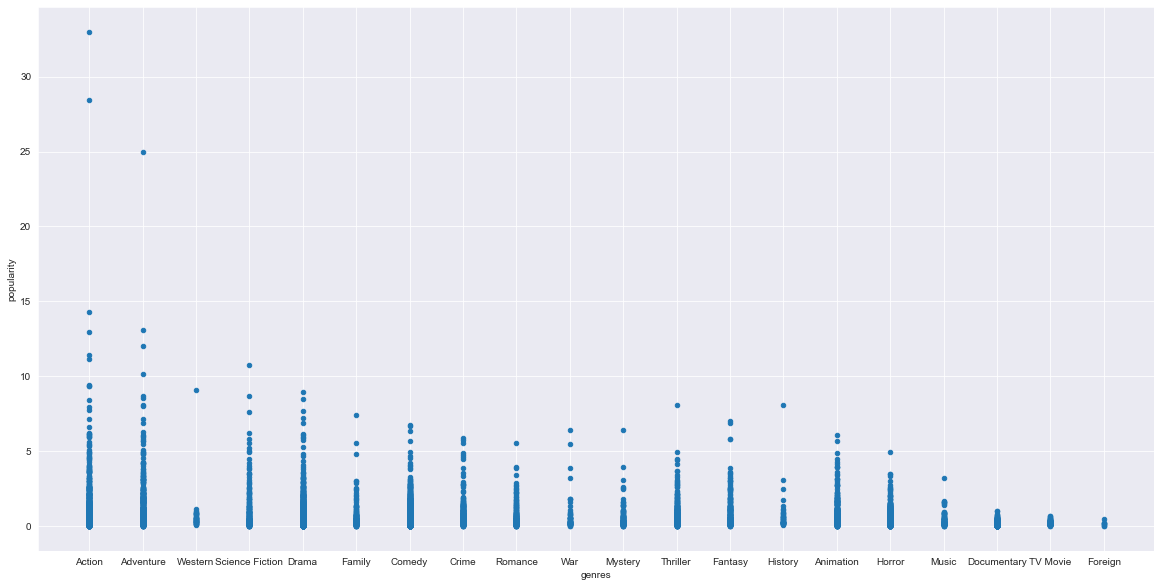

In [35]:
# correlation betweem genres and popularity
data.plot(x = 'genres' , y = 'popularity' , kind = 'scatter' , figsize = (20,10));

* the most two popularity movies are (Action , Adventure) 
* the least two popularity movies are (Foreign , TV Movie)

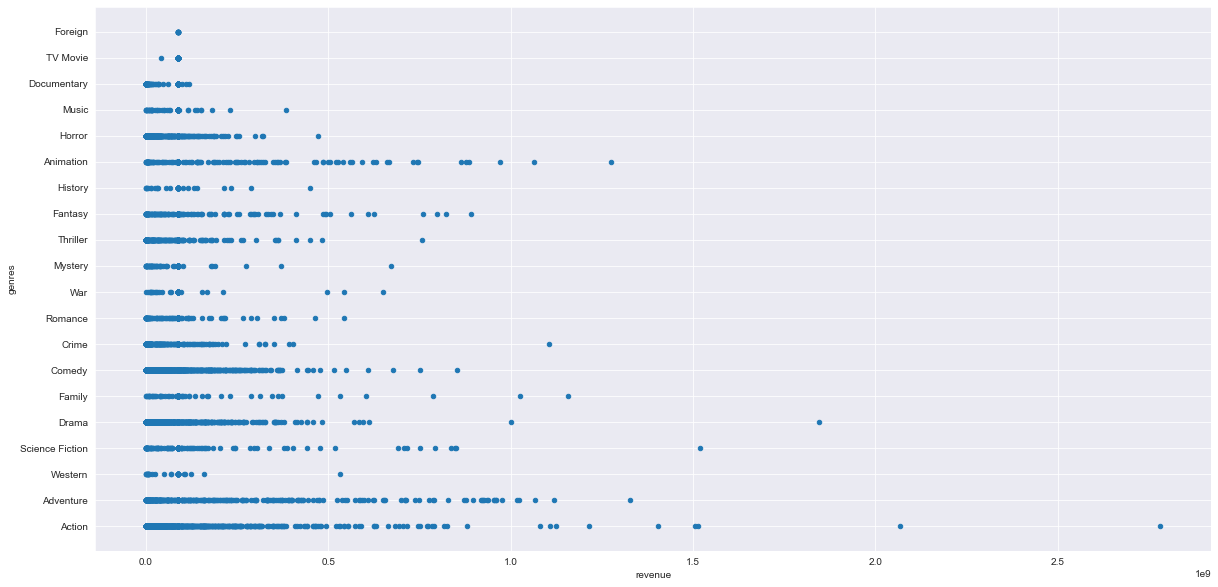

In [36]:
# correlation betweem revenue and genres
data.plot(x = 'revenue' , y = 'genres' , kind = 'scatter' , figsize = (20,10));

* the higest revenue movies are (Action , Adventure) 
* the lower two revenue movies are (Foreign , TV Movie)

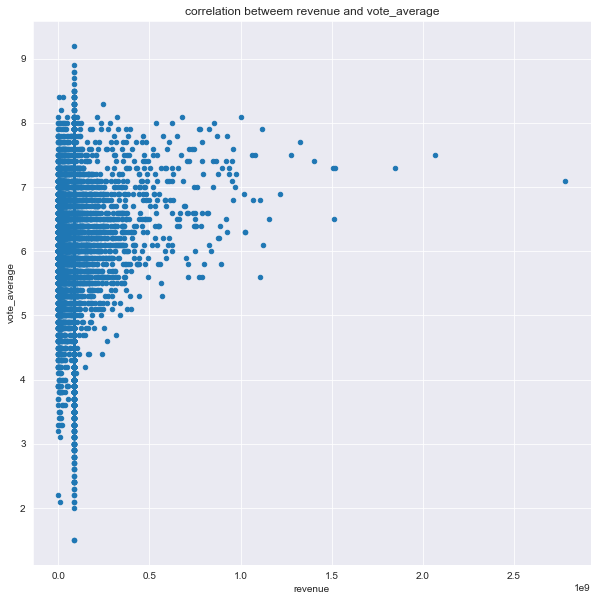

In [37]:
# correlation betweem revenue and vote_average
data.plot(x = 'revenue' , y = 'vote_average' , kind = 'scatter' , figsize = (10,10) , title = 'correlation betweem revenue and vote_average');

* it seems and noisy correlation we can not know the correct answer now 

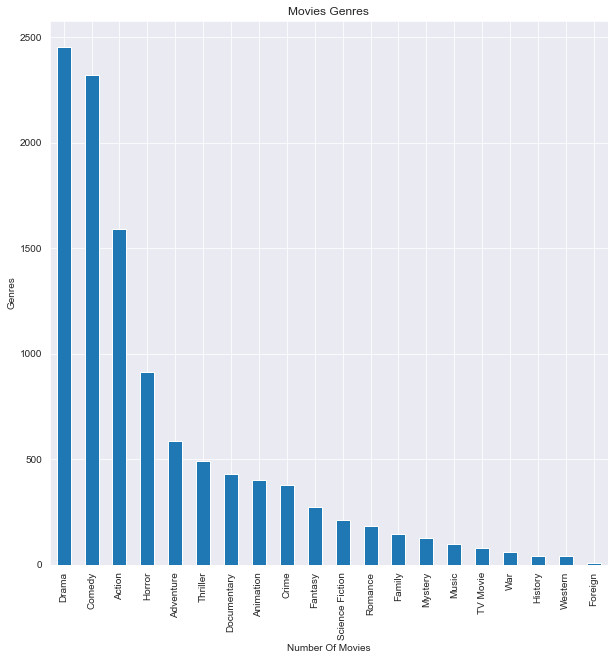

In [38]:
#draw a bar chart for movie genres
data['genres'].value_counts().plot(ylabel= 'Genres', xlabel= 'Number Of Movies', kind= 'bar', figsize= (10,10), title = 'Movies Genres');

* The most movie genres is our dataset is 'Drama' maybe between (2400 to 2500) movies 
* The least movie genres is our dataset is 'Foreign' 

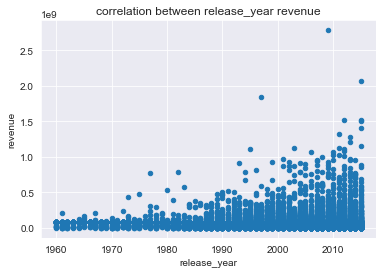

In [39]:
# to see correlation between release_year revenue
data.plot(x = 'release_year' , y = 'revenue' , kind = 'scatter' , title = 'correlation between release_year revenue');

* its maybe noisy but..
* in 1960 to 1970 wa can say its smallest revenue..
* in 2010 to 2015 wa can say its largest revenue..

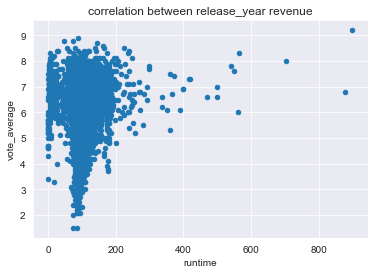

In [40]:
# to see correlation between release_year revenue
data.plot(x = 'runtime' , y = 'vote_average' , kind = 'scatter' , title = 'correlation between release_year revenue');

* there is no correltaio that we can see

<a id='conclusions'></a>
## Conclusions

* Finally we can cleaning data with no affected in our dataset
* most kind of movies is 'Drama' and least is 'Foreign'
* most revenue was 2781505847 its Action movie and named 'Avatar'
* least  revenue was 2 with no zero revenue its Action movie and named ' '7 '
* Most of our movies is dataset is between 170 to 190 minutes and no correlation between it and voting
* we can say that there is correlation between more year and revenue and there  

### Limitations 
* in our dataset there is more values with zeros and it make visalization sometimes not clear 
* it was important to be correlation between voting and runtime of movie to focus on this limit time 